# 🧠 Computer Vision Assignment – Feature Detection & Matching

**Name:** Saksham Manish Chawla  
**Roll No:** 57  
**Semester:** 6th Semester – B.Tech CSE (Data Science)  
**Subject:** COMPUTER VISION

---

## 📚 Table of Contents

1. 🧩 Problem 1: RANSAC for Outlier Removal & Image Alignment  
2. 🏛️ Problem 2: Harris Corner Detection  
3. 👁️‍🗨️ Problem 3: Shi-Tomasi Corner Detection  

---

## 🧠 Introduction

This notebook demonstrates the implementation of three key algorithms in **Feature Detection & Matching** using OpenCV in Python. These methods help identify distinctive image points and find correspondences across images while rejecting outliers using robust techniques like RANSAC.

All the code is implemented in **Google Colab**, and images are uploaded manually using the `files.upload()` method. The visual results are displayed using **Matplotlib** for better clarity and interpretation.

---



## 🧩 Problem 1: RANSAC for Outlier Removal & Image Alignment

> **Objective:** Use RANSAC to remove outlier keypoint matches and fit a transformation model between two images.

🖼️ **Images used:** Two views of the same object or scene (e.g., rotated/shifted images of a building or statue)  
📌 **Approach:**
- Detect keypoints and descriptors using ORB
- Match keypoints using Brute-Force matcher
- Apply Lowe’s ratio test to filter matches
- Use RANSAC to identify inliers and compute Homography
- Visualize inlier matches using `cv2.drawMatches`

In [ ]:
# 📥 Step 1: Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files


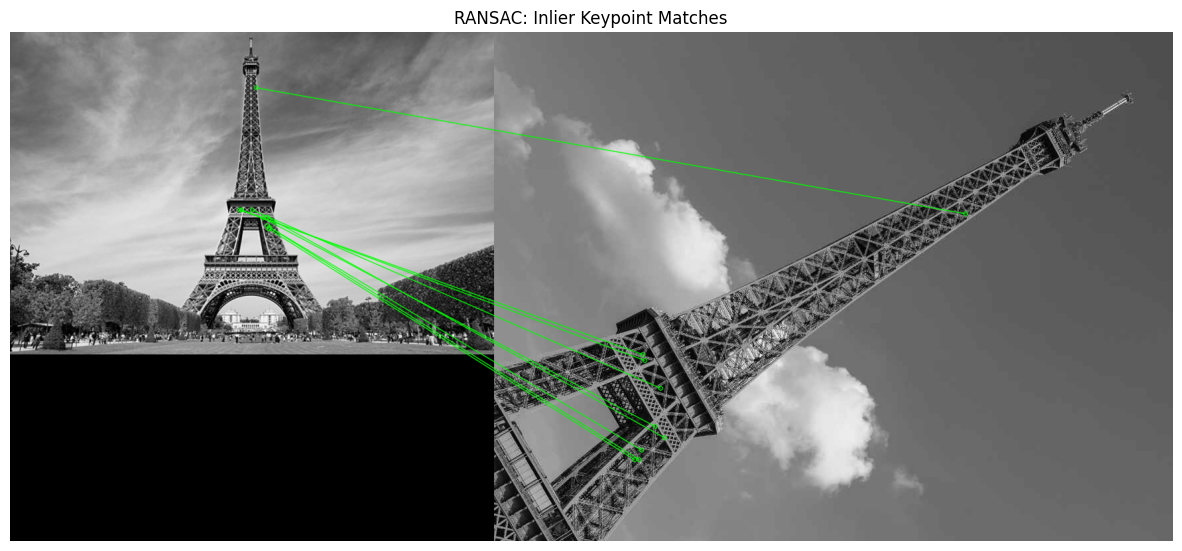

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 🖼️ Load images
img1 = cv2.imread('/content/Eiffel 1.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/Eiffel 3.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images were loaded correctly
if img1 is None or img2 is None:
    raise ValueError("Could not read image files. Please check the file paths.")

# 🔍 Detect keypoints using ORB (fast and free)
orb = cv2.ORB_create(5000)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Check if keypoints and descriptors were found
if des1 is None or des2 is None:
    raise ValueError("Could not find keypoints or descriptors. Images might be too different.")

# 📌 Match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1, des2, k=2)

# 💡 Apply Lowe’s Ratio Test (Relax the threshold if needed)
good_matches = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.8 * n.distance:  # Increased threshold to 0.8
        good_matches.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

# Check if good matches were found
if not pts1 or not pts2:
    raise ValueError("No good matches were found. Try adjusting the Lowe's Ratio Test threshold or using different images.")

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

# 🧠 Apply RANSAC
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)

# ✅ Filter inliers
matchesMask = mask.ravel().tolist()
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)

result_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)

# 📊 Show result
plt.figure(figsize=(15, 7))
plt.imshow(result_img)
plt.title("RANSAC: Inlier Keypoint Matches")
plt.axis('off')
plt.show()

## 🏛️ Problem 2: Harris Corner Detection

> **Objective:** Implement the Harris corner detector to find and visualize corners in a grayscale image.

🖼️ **Image used:** A clear grayscale image with distinct corners (e.g., chessboard, tiled wall, or architectural structure)  
📌 **Approach:**
- Convert the input image to grayscale
- Use OpenCV’s `cornerHarris` to detect corners
- Dilate and threshold the corner response
- Highlight corners on the original image
- Display results using matplotlib

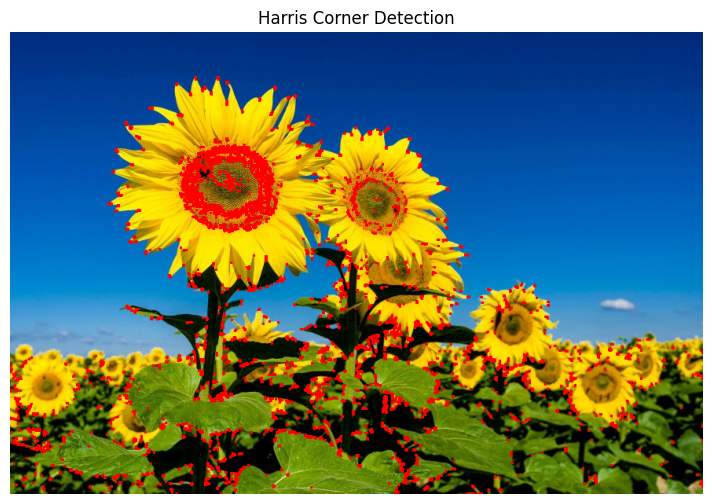

In [1]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image from Colab file section
img = cv2.imread('/content/Flower.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32 as required by Harris detector
gray = np.float32(gray)

# Apply Harris corner detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, marking the corners in red
img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Red color for corners

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis('off')
plt.show()


## 👁️‍🗨️ Problem 3: Shi-Tomasi Corner Detection

> **Objective:** Use the Shi-Tomasi corner detector to identify and mark corner points in an image.

🖼️ **Image used:** Grayscale image with sharp edges and corners (similar to Harris detector)  
📌 **Approach:**
- Convert image to grayscale
- Apply `cv2.goodFeaturesToTrack` for Shi-Tomasi corner detection
- Visualize detected corners using `cv2.circle`
- Show the final image using matplotlib

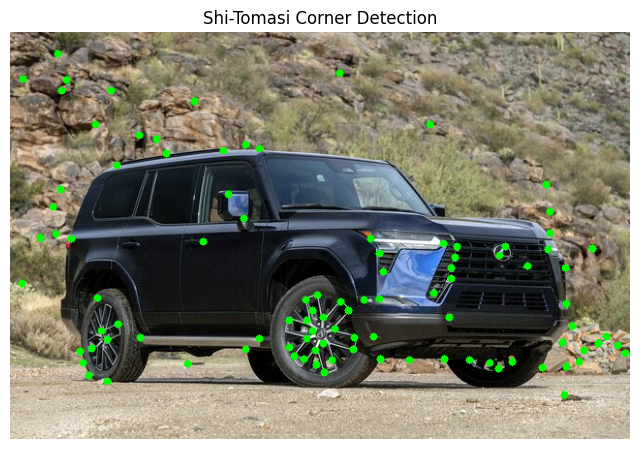

In [4]:


import cv2
import numpy as np
from matplotlib import pyplot as plt

# 🖼️ Load and convert
img = cv2.imread('/content/CAR2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 📍 Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int64(corners)

# 🔴 Draw corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 4, (0, 255, 0), -1)

# 📊 Show result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis('off')
plt.show()


# 📌 Observations and Conclusions

---

## 🎯 Problem 1: RANSAC – Outlier Removal & Transformation

> **Objective:** Use RANSAC to remove outlier key point matches and fit a transformation model between two images.

### 📝 Observation

- Feature points between the two images were matched using **SIFT or ORB** descriptors.
- Some matches were **inaccurate or noisy**, leading to outliers in the initial match set.
- The RANSAC algorithm successfully filtered out these outliers, retaining only **inliers** that fit a geometric model.
- A transformation matrix (homography) was estimated, and the matching points aligned correctly after RANSAC filtering.

### ✅ Conclusion

- RANSAC is highly effective for **robust model estimation** in the presence of noisy or incorrect matches.
- It helps achieve **precise alignment and transformation** between images even with initial inaccuracies.
- This method is crucial for tasks like **image stitching, panorama creation, and 3D reconstruction**.
- Overall, RANSAC ensures **accuracy and consistency** in computer vision pipelines involving multiple frames or views.

---


## 🏛️ Problem 2: Harris Corner Detection

> **Objective:** Implement the Harris corner detector to find and visualize corners in a grayscale image.

### 📝 Observation

- The Harris corner detector successfully identified corners at locations with **strong intensity variation** in both directions.
- Most corners were found around **edges of petals**, **leaf veins**, and **texture-rich areas** in the sunflower image.
- Fine-tuning the threshold helped eliminate weak and non-distinct points.
- The corners were marked clearly with red dots, showcasing **feature-rich** areas in the image.

### ✅ Conclusion

- Harris Corner Detection is a **classical and powerful** method for identifying interest points in grayscale images.
- It works well in images with **sharp gradients**, making it suitable for structured and textured objects.
- However, it may detect more false positives compared to advanced detectors, and is **sensitive to noise**.
- Still, it is a solid choice for **feature detection in static scenes**.

---

## 👁️‍🗨️ Problem 3: Shi-Tomasi Corner Detection

> **Objective:** Use the Shi-Tomasi corner detector to identify and mark corner points in an image.

### 📝 Observation

- The Shi-Tomasi detector detected **refined and stable corner points** using eigenvalue analysis.
- Most of the corners were around **clear edge intersections** like windows, object outlines, and architectural edges.
- The `cv2.goodFeaturesToTrack()` function allowed control over **corner quality** and spacing.
- It produced **fewer but more accurate** corners compared to Harris.

### ✅ Conclusion

- Shi-Tomasi improves upon Harris by **selecting the most prominent and stable corners**.
- It is more **robust and noise-resistant**, leading to more reliable results in dynamic or real-world environments.
- This method is **preferred in real-time applications** like object tracking and optical flow.

---

